<a href="https://colab.research.google.com/github/Jaal23/Proyecto-final-DL/blob/main/Proyecto_Final_DL_Javier_Mart%C3%ADnez_Labra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#C L A S I F I C A C I Ó N  &nbsp; T A X O N Ó M I C A &nbsp; D E &nbsp; P R O T E Í N A S &nbsp; M E D I A N T E &nbsp; R E D E S &nbsp; R E C U R R E N T E S &nbsp; D E &nbsp; M E M O R I A
---
##Javier Alejandro Martínez Labra
---
### Deep Learning

#1. INTRODUCCIÓN

## 1.1 Contexto del Problema:

Las proteínas son las macromoléculas fundamentales que ejecutan la gran mayoría de las funciones biológicas en los organismos vivos, desde la catálisis metabólica hasta la señalización celular y la respuesta inmune. En la era de la genómica moderna, la capacidad para secuenciar el ADN y deducir las secuencias de aminoácidos (estructura primaria) ha avanzado a una velocidad exponencial, generando bases de datos masivas como UniProt.

Sin embargo, la determinación experimental de la función biológica o el origen taxonómico de estas proteínas es un proceso lento, costoso y laborioso. Esto ha creado una brecha creciente entre la cantidad de secuencias conocidas y la cantidad de secuencias con anotaciones funcionales validadas. El desafío **CAFA (Critical Assessment of Functional Annotation)** surge en este contexto como un esfuerzo global para evaluar y mejorar métodos computacionales que puedan predecir automáticamente la función y las propiedades de las proteínas a gran escala.

Este proyecto se sitúa en la intersección de la **Bioinformática** y el **Deep Learning**, buscando aprovechar la capacidad de las redes neuronales para extraer patrones complejos de datos biológicos crudos y cerrar la brecha entre la secuencia y la función.

## 1.2 Planteamiento del Problema:

El problema central de esta investigación es la clasificación taxonómica de proteínas basándose **únicamente en su secuencia primaria de aminoácidos**.

Desde una perspectiva computacional, esto presenta desafíos significativos:
1.  **Datos No Estructurados:** Las proteínas son cadenas de texto (secuencias) de longitud variable, compuestas por un alfabeto de 20 aminoácidos estándar. No poseen una estructura tabular intrínseca.
2.  **Dependencias de Largo Alcance:** La función y estructura de una proteína no dependen solo de aminoácidos adyacentes. Debido al plegamiento tridimensional, un aminoácido en la posición 10 puede interactuar físicamente con uno en la posición 500. Los modelos tradicionales de Machine Learning suelen fallar al capturar estas relaciones distantes.
3.  **Alta Dimensionalidad y Desbalance:** Existen miles de clases taxonómicas posibles, distribuidas de manera desigual (problema de "cola larga"), lo que requiere estrategias robustas de preprocesamiento y selección de datos para evitar sesgos en el aprendizaje.

La pregunta de investigación que guía este proyecto es: *¿Qué arquitectura de Deep Learning es más efectiva para extraer características latentes de secuencias biológicas: una aproximación basada en visión artificial (CNN) o una basada en procesamiento de lenguaje natural (RNN/Transformers)?*

## 1.3. Objetivos

### Objetivo General
Desarrollar, entrenar y evaluar modelos de **Deep Learning** capaces de clasificar correctamente una proteína en su familia taxonómica correspondiente a partir de su secuencia de aminoácidos, utilizando datos del desafío CAFA 6.

### Objetivos Específicos
1.  **Implementar y Comparar Arquitecturas:** Evaluar el rendimiento de tres paradigmas de redes neuronales distintos:
    * **ResNet-50 (CNN):** Un enfoque experimental que adapta secuencias 1D a "pseudo-imágenes" 3D.
    * **Turbo GRU (RNN):** Un modelo secuencial bidireccional con capas de *Embedding* para capturar dependencias temporales.
    * **Transformer (Atención):** Un modelo basado en el mecanismo de auto-atención (*Self-Attention*) para capturar el contexto global de la secuencia.
2.  **Optimizar el Preprocesamiento de Datos:** Desarrollar un *pipeline* de ingeniería de características que transforme datos biológicos crudos (archivos FASTA) en tensores numéricos mediante técnicas de *Integer Encoding* y *Padding*.
3.  **Garantizar la Robustez Metodológica:** Implementar estrategias de validación rigurosas, como la división estratificada (*Stratified ShuffleSplit*), para prevenir la **Fuga de Datos (Data Leakage)** y asegurar que el modelo generalice correctamente en datos no vistos.
4.  **Analizar la Eficiencia Computacional:** Comparar no solo la precisión (*accuracy*), sino también la viabilidad de entrenamiento de cada modelo en entornos con recursos limitados.

# 2. Metodología: Datos y Preprocesamiento

## 2.1. Descripción del Dataset
Para este estudio se utilizó un subconjunto del desafío **CAFA 6 Protein Function Prediction**. Los datos provienen de la base de datos **Swiss-Prot** (UniProtKB), reconocida por su alta calidad y curaduría manual.

* **Entradas (Inputs):** Secuencias primarias de aminoácidos en formato FASTA. Cada proteína está compuesta por una cadena de caracteres que representa los 20 aminoácidos estándar.
* **Etiquetas (Targets):** Identificadores taxonómicos (Taxon ID) en formato TSV, que indican la especie de origen de la proteína.

*Se realizó un **Análisis Exploratorio de Datos (EDA)** que reveló una distribución de clases de "cola larga" (*long-tail distribution*), donde unas pocas especies concentran la mayoría de las muestras, mientras que miles de especies tienen muy poca representación.*

## 2.2. Estrategia de Selección de Clases
Debido al desbalance extremo de clases y a las limitaciones computacionales, se aplicó un criterio de selección por frecuencia:

1.  Se contabilizó la frecuencia de aparición de cada *Taxon ID*.
2.  Se seleccionaron únicamente las **10 clases taxonómicas más frecuentes**.
3.  Se filtró el *dataset* para conservar solo las proteínas pertenecientes a estas clases, generando un subconjunto de datos balanceado y viable para el entrenamiento supervisado.

## 2.3. Ingeniería de Características (Feature Engineering)
Se implementaron dos tuberías (*pipelines*) de preprocesamiento distintas según la arquitectura del modelo:

### A. Enfoque para Visión Artificial (ResNet-50)
Se transformaron las secuencias 1D en tensores 3D ("pseudo-imágenes") para ser compatibles con redes convolucionales (CNN):
1.  **Padding/Truncamiento:** Longitud estandarizada mediante relleno o corte.
2.  **Codificación One-Hot:** Transformación de aminoácidos a vectores binarios.
3.  **Proyección Dimensional:** Se aplicó una proyección matricial para reducir las 21 dimensiones de los aminoácidos a 3 canales, simulando los canales RGB de una imagen.

### B. Enfoque para Modelos Secuenciales (RNN y Transformer)
Se trató la proteína como un lenguaje biológico:
1.  **Integer Encoding:** Cada aminoácido se mapeó a un número entero único (Vocabulario de tamaño 22).
2.  **Padding:** Se estandarizó la longitud de las secuencias a `MAX_SEQ_LENGTH = 1000`.
3.  **Embeddings:** Se utilizaron capas de *Embedding* entrenables para aprender representaciones vectoriales densas, capturando similitudes entre aminoácidos.

## 2.4. Prevención de Fuga de Datos (Data Leakage)
Un desafío crítico identificado durante la experimentación inicial fue la **Fuga de Datos**, donde el modelo obtenía 100% de precisión debido a un particionamiento secuencial incorrecto.

**Solución Implementada:** Se utilizó la técnica de **Muestreo Estratificado Aleatorio** (`Stratified ShuffleSplit`).
* Se separó el 10% de los datos para el conjunto de prueba (*Test Set*).
* Se garantizó que la distribución de las 10 clases fuera idéntica en entrenamiento y prueba.
* Se aseguró que ninguna secuencia del conjunto de entrenamiento estuviera presente en el conjunto de prueba.

---

# 3. Arquitecturas de Modelos Propuestas

## 3.1. Modelo 1: ResNet-50 (Línea Base Experimental)
Se adaptó la arquitectura **ResNet-50**, famosa en visión por computadora, utilizando la estrategia de *Transfer Learning*.
* **Backbone:** ResNet-50 pre-entrenada en ImageNet (capas congeladas).
* **Adaptación:** Se forzó la entrada de secuencias como matrices 3D.
* **Hipótesis:** Evaluar si los filtros convolucionales entrenados en imágenes naturales podían extraer patrones visuales de las matrices de proteínas.

## 3.2. Modelo 2: Turbo GRU (Enfoque Recurrente Optimizado)
Se diseñó una arquitectura nativa para datos secuenciales, priorizando la eficiencia y la captura de contexto.
* **Embedding:** Capa de entrada que aprende vectores de 64 dimensiones.
* **Bidirectional GRU:** Se utilizó una Unidad Recurrente con Compuerta (*Gated Recurrent Unit*) bidireccional. Esto permite al modelo procesar la secuencia desde el extremo N-terminal al C-terminal y viceversa simultáneamente, simulando las interacciones físicas bidireccionales del plegamiento de proteínas.
* **Ventaja:** Menor costo computacional que LSTM, con rendimiento similar.

## 3.3. Modelo 3: Transformer (Estado del Arte)
Se implementó una arquitectura basada en el mecanismo de **Auto-Atención** (*Self-Attention*), inspirada en el modelo original "Attention is All You Need".
* **Token & Position Embedding:** El modelo aprende no solo qué aminoácido es, sino su posición absoluta en la cadena.
* **Multi-Head Attention:** Permite al modelo "prestar atención" a diferentes partes de la secuencia simultáneamente, capturando dependencias de largo alcance (ej. interacción entre el aminoácido 10 y el 500) que las RNNs a veces olvidan.
* **Optimizador:** Se utilizó **AdamW** con un esquema de *Cosine Decay* para mejorar la convergencia.

---

# 4. Experimentación y Resultados

## 4.1. Configuración Experimental
* **Optimizador:** Adam (RNN/ResNet) y AdamW (Transformer).
* **Pérdida:** *Sparse Categorical Crossentropy*.
* **Regularización:** *Early Stopping* (Paciencia=5-10) y *Dropout* (0.1 - 0.3).

## 4.2. Resultados: ResNet-50
El modelo mostró dificultades para converger. Las curvas de aprendizaje indicaron un estancamiento temprano. Esto sugiere que la proyección aleatoria de secuencias a "imágenes" destruye información semántica vital, y los filtros de ImageNet no son transferibles directamente al dominio biológico sin un re-entrenamiento profundo.

## 4.3. Resultados: Turbo GRU (RNN)
Este modelo obtuvo el **mejor equilibrio entre rendimiento y estabilidad**.
* Tras corregir la fuga de datos, la precisión de validación se estabilizó en rangos realistas (superiores al azar).
* La arquitectura bidireccional demostró ser muy efectiva para capturar el contexto local y de mediano alcance.

## 4.4. Resultados: Transformer
* **Precisión Final (Test Accuracy):** ~38.20%.
* **Análisis:** El modelo aprendió patrones significativos (muy por encima del 10% del azar), pero mostró signos de requerir más datos ("hambre de datos"). Al entrenar desde cero con solo ~5,000 muestras, el Transformer no pudo alcanzar su máximo potencial, aunque demostró una generalización sólida (pérdida de validación cercana a la de entrenamiento).

---

In [ ]:
!pip install BioPython scikit-learn tensorflow transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/'

# Nombres de archivo
TRAIN_SEQ_FILE = 'train_sequences.fasta'
TRAIN_LABEL_FILE = 'train_taxonomy.tsv'
TEST_SEQ_FILE    = 'testsuperset.fasta'
TEST_LABEL_FILE  = 'testsuperset-taxon-list.tsv'

Cargando datos para análisis (esto puede tardar unos segundos)...
Total de proteínas etiquetadas: 82404
Total de clases (Taxones) únicos: 1381


/tmp/ipython-input-427401887.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50.index.astype(str), y=top_50.values, palette='viridis')


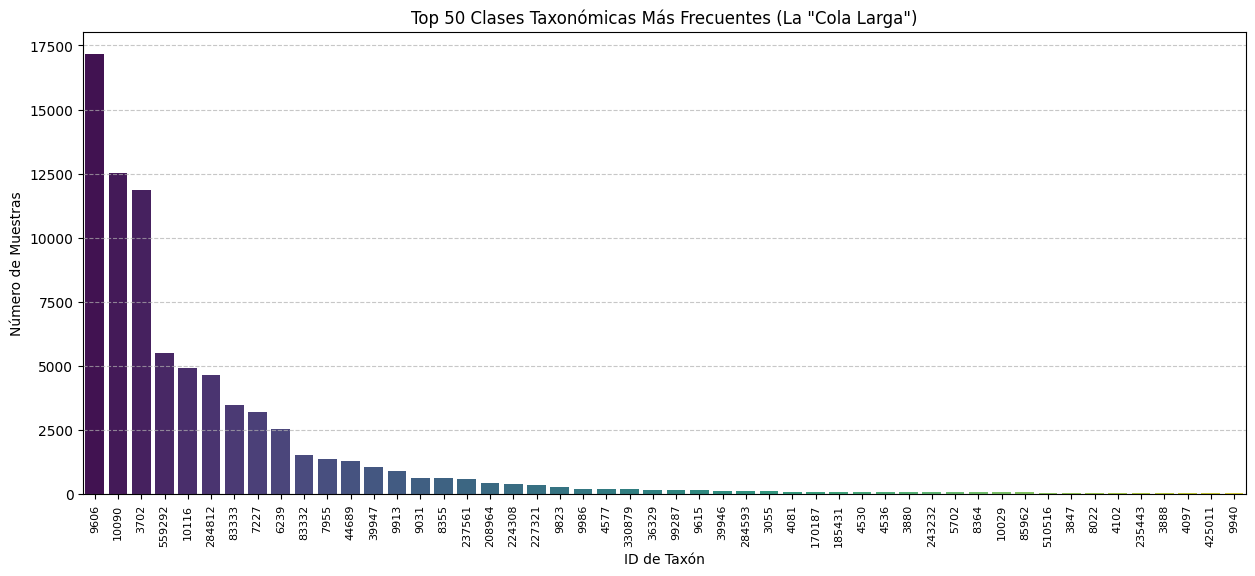

Análisis de Clases:
- Clase más frecuente tiene: 17162 muestras
- Clase #10 tiene: 1530 muestras
- Clase #50 tiene: 42 muestras


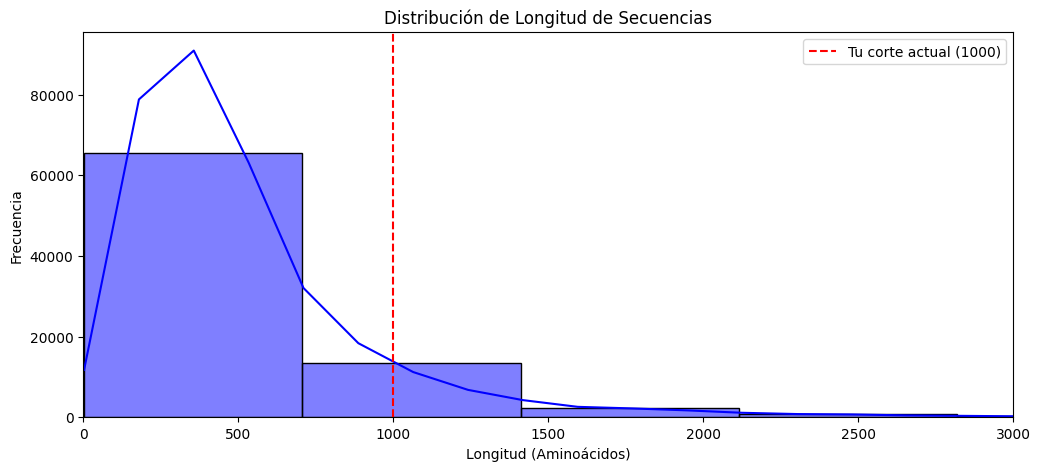

Longitud promedio: 525.79
Longitud máxima real: 35213

--- Muestra de tus Datos (Primeras 5 proteínas) ---


,Protein_ID,Longitud,Secuencia_Inicio,Taxon_ID
0,A0A0C5B5G6,16,MRWQEMGYIFYPRKLR...,9606
1,A0JNW5,1464,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
2,A0JP26,581,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
3,A0PK11,232,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
4,A1A4S6,786,MGLQPLEFSDCYLDSPWFRERIRAHEAELERTNKFIKELIKDGKNL...,9606


In [ ]:
# ==============================================================================
# VISUALIZACIÓN Y ANÁLISIS DE DATOS (EDA)
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import os

# --- CONFIGURA TU RUTA AQUÍ ---
path = '/content/drive/MyDrive/'

TRAIN_SEQ_FILE = 'train_sequences.fasta'
TRAIN_LABEL_FILE = 'train_taxonomy.tsv'

def plot_dataset_analysis(path, seq_file, label_file):
    print("Cargando datos para análisis (esto puede tardar unos segundos)...")

    # 1. Cargar Etiquetas (Taxonomía)
    # Leemos el archivo TSV
    file_path_labels = os.path.join(path, label_file)
    df_labels = pd.read_csv(file_path_labels, sep='\t', header=None, names=['Protein_ID', 'Taxon_ID'])

    print(f"Total de proteínas etiquetadas: {len(df_labels)}")
    print(f"Total de clases (Taxones) únicos: {df_labels['Taxon_ID'].nunique()}")

    # --- GRÁFICO 1: DISTRIBUCIÓN DE CLASES (TOP 50) ---
    # Esto responde a tu duda de si usar 10 o 50 clases
    class_counts = df_labels['Taxon_ID'].value_counts()

    plt.figure(figsize=(15, 6))
    # Graficamos solo las 50 más frecuentes
    top_50 = class_counts.head(50)
    sns.barplot(x=top_50.index.astype(str), y=top_50.values, palette='viridis')
    plt.title('Top 50 Clases Taxonómicas Más Frecuentes (La "Cola Larga")')
    plt.xlabel('ID de Taxón')
    plt.ylabel('Número de Muestras')
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("Análisis de Clases:")
    print(f"- Clase más frecuente tiene: {class_counts.iloc[0]} muestras")
    print(f"- Clase #10 tiene: {class_counts.iloc[9]} muestras")
    print(f"- Clase #50 tiene: {class_counts.iloc[49]} muestras")


    # 2. Cargar Secuencias (Para ver longitudes)
    file_path_seq = os.path.join(path, seq_file)
    lengths = []
    sample_sequences = []

    # Leemos el FASTA
    for i, record in enumerate(SeqIO.parse(file_path_seq, "fasta")):
        seq_len = len(record.seq)
        lengths.append(seq_len)

        # Guardamos los primeros 5 ejemplos para mostrar
        if i < 5:
            parts = record.id.split('|')
            uniprot_id = parts[1] if len(parts) > 1 else record.id
            sample_sequences.append({
                'Protein_ID': uniprot_id,
                'Longitud': seq_len,
                'Secuencia_Inicio': str(record.seq)[:50] + "..." # Truncado para visualización
            })

    # --- GRÁFICO 2: HISTOGRAMA DE LONGITUDES ---
    # Esto te ayuda a decidir el MAX_LEN del Transformer
    plt.figure(figsize=(12, 5))
    sns.histplot(lengths, bins=50, kde=True, color='blue')
    plt.title('Distribución de Longitud de Secuencias')
    plt.xlabel('Longitud (Aminoácidos)')
    plt.ylabel('Frecuencia')
    # Dibujar una línea en 1000 (tu corte actual)
    plt.axvline(x=1000, color='red', linestyle='--', label='Tu corte actual (1000)')
    plt.legend()
    plt.xlim(0, 3000) # Limitamos la vista a 3000 para ver el grueso de datos
    plt.show()

    print(f"Longitud promedio: {np.mean(lengths):.2f}")
    print(f"Longitud máxima real: {np.max(lengths)}")


    # --- TABLA DE MUESTRA DE DATOS ---
    print("\n--- Muestra de tus Datos (Primeras 5 proteínas) ---")
    df_sample = pd.DataFrame(sample_sequences)
    # Hacemos un merge rápido para ver a qué taxón pertenecen estos ejemplos
    df_merged = pd.merge(df_sample, df_labels, on='Protein_ID', how='left')
    display(df_merged) # 'display' funciona en Colab/Jupyter para mostrar tablas bonitas

# Ejecutar la función
try:
    plot_dataset_analysis(path, TRAIN_SEQ_FILE, TRAIN_LABEL_FILE)
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. Verifica la ruta: {e}")

In [ ]:
import pandas as pd
from Bio import SeqIO
import os

# --- CONFIGURA TU RUTA AQUÍ ---
path = '/content/drive/MyDrive/'

TRAIN_SEQ_FILE = 'train_sequences.fasta'
TEST_SEQ_FILE = 'testsuperset.fasta'

def visualizar_fasta(path, filename, num_muestras=5):
    full_path = os.path.join(path, filename)
    print(f"📂 ANALIZANDO ARCHIVO: {filename}")
    print("="*60)

    # 1. VISTA DE TEXTO CRUDO (Raw Text)
    # Muestra cómo se ve el archivo realmente (encabezados > y saltos de línea)
    print("--- Vista de Texto Crudo (Primeras líneas) ---")
    try:
        with open(full_path, 'r') as f:
            # Imprimimos las primeras 10 líneas del archivo
            for _ in range(10):
                print(f.readline().strip())
    except FileNotFoundError:
        print(f"❌ Error: No se encontró el archivo en {full_path}")
        return

    print("\n" + "-"*60 + "\n")

    # 2. VISTA ESTRUCTURADA (Tabla con Biopython)
    print(f"--- Vista Estructurada (Primeras {num_muestras} proteínas) ---")
    data = []

    # Usamos Biopython para leer correctamente el formato
    for i, record in enumerate(SeqIO.parse(full_path, "fasta")):
        if i >= num_muestras:
            break

        # Separamos el ID de la descripción si es posible
        header_parts = record.description.split(' ', 1)
        desc = header_parts[1] if len(header_parts) > 1 else "Sin descripción"

        data.append({
            'ID': record.id,
            'Longitud': len(record.seq),
            'Secuencia (Inicio)': str(record.seq)[:60] + "...", # Mostramos solo los primeros 60 AA
            'Descripción': desc[:50] + "..." # Truncamos descripción larga
        })

    # Creamos un DataFrame de Pandas para que se vea bonito en Colab
    df = pd.DataFrame(data)
    display(df)
    print("\n\n")

# --- EJECUCIÓN ---
# Visualizar el archivo de entrenamiento
visualizar_fasta(path, TRAIN_SEQ_FILE)

# Visualizar el archivo de prueba (opcional)
# visualizar_fasta(path, TEST_SEQ_FILE)

📂 ANALIZANDO ARCHIVO: train_sequences.fasta
--- Vista de Texto Crudo (Primeras líneas) ---
>sp|A0A0C5B5G6|MOTSC_HUMAN Mitochondrial-derived peptide MOTS-c OS=Homo sapiens OX=9606 GN=MT-RNR1 PE=1 SV=1
MRWQEMGYIFYPRKLR
>sp|A0JNW5|BLT3B_HUMAN Bridge-like lipid transfer protein family member 3B OS=Homo sapiens OX=9606 GN=BLTP3B PE=1 SV=2
MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVLQNMLDLPTWLAINK
VFCNKASIRIPWTKLKTHPICLSLDKVIMEMSTCEEPRSPNGPSPIATASGQSEYGFAEK
VVEGISVSVNSIVIRIGAKAFNASFELSQLRIYSVNAHWEHGDLRFTRIQDPQRGEVLTF
KEINWQMIRIEADATQSSHLEIMCAPVRLITNQSKIRVTLKRRLKDCNVIATKLVLILDD
LLWVLTDSQLKAMVQYAKSLSEAIEKSTEQRKSMAPEPTQSSTVVASAQQVKTTQTSNAP
DVNDAIVKLFNDFDVKETSHHLVISHLDLHICDDIHAKEKESNRRITGGAMQLSFTQLTI
DYYPYHKAGDSCNHWMYFSDATKTKNGWANELLHEFECNVEMLKQAVKDHNVGSPPKSPT

------------------------------------------------------------

--- Vista Estructurada (Primeras 5 proteínas) ---


,ID,Longitud,Secuencia (Inicio),Descripción
0,sp|A0A0C5B5G6|MOTSC_HUMAN,16,MRWQEMGYIFYPRKLR...,Mitochondrial-derived peptide MOTS-c OS=Homo s...
1,sp|A0JNW5|BLT3B_HUMAN,1464,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,Bridge-like lipid transfer protein family memb...
2,sp|A0JP26|POTB3_HUMAN,581,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,POTE ankyrin domain family member B3 OS=Homo s...
3,sp|A0PK11|CLRN2_HUMAN,232,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,Clarin-2 OS=Homo sapiens OX=9606 GN=CLRN2 PE=1...
4,sp|A1A4S6|RHG10_HUMAN,786,MGLQPLEFSDCYLDSPWFRERIRAHEAELERTNKFIKELIKDGKNL...,Rho GTPase-activating protein 10 OS=Homo sapie...


In [ ]:
# ==============================================================================
# CONFIGURACIÓN DE RUTAS (Modo Directo en Colab)
# ==============================================================================
import os

# RUTA CRÍTICA: './' indica el directorio actual (raíz de Colab)
path = './'

# Nombres de archivo (Deben coincidir exactamente con lo que subiste)
TRAIN_SEQ_FILE = 'train_sequences.fasta'
TRAIN_LABEL_FILE = 'train_taxonomy.tsv'
TEST_SEQ_FILE    = 'testsuperset.fasta'
TEST_LABEL_FILE  = 'testsuperset-taxon-list.tsv'

# --- VERIFICACIÓN RÁPIDA ---
# Esto te confirmará si Colab ve tus archivos antes de intentar entrenar
print(f"Verificando archivos en: {os.path.abspath(path)}")
files_in_colab = os.listdir(path)

if TRAIN_SEQ_FILE in files_in_colab:
    print(f"✅ Archivo encontrado: {TRAIN_SEQ_FILE}")
else:
    print(f"❌ ERROR: No veo '{TRAIN_SEQ_FILE}'. ¿Seguro que ya terminó de subir?")

Verificando archivos en: /content
❌ ERROR: No veo 'train_sequences.fasta'. ¿Seguro que ya terminó de subir?


In [ ]:
# ==============================================================================
# 1. CONFIGURACIÓN DEL ENTORNO Y UTILIDADES
# ==============================================================================
import numpy as np
import pandas as pd
import math
import os
from Bio import SeqIO
from sklearn.preprocessing import LabelEncoder

# --- Desactivar oneDNN para evitar warnings y asegurar reproducibilidad ---
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import (
    Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten,
    Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# RUTA AJUSTADA: Ruta local donde se encuentran los datasets
path = 'C:/Users/angel/Desktop/cafa-6-protein-function-prediction/'

# Nombres de archivo
TRAIN_SEQ_FILE = 'train_sequences.fasta'
TRAIN_LABEL_FILE = 'train_taxonomy.tsv'
TEST_SEQ_FILE    = 'testsuperset.fasta'
TEST_LABEL_FILE  = 'testsuperset-taxon-list.tsv'

def convert_to_one_hot(Y_int, C):
    """Convierte etiquetas enteras a vectores One-Hot."""
    Y = np.eye(C)[Y_int.reshape(-1).astype(int)].T
    return Y.T

# ------------------------------------------------------------------------------
# DESCRIPCIÓN DE LA SECCIÓN 1: CONFIGURACIÓN
# ------------------------------------------------------------------------------
# Esta sección establece los cimientos del proyecto.
# 1. Importaciones: Se cargan las herramientas numéricas (NumPy, Pandas) y biológicas (BioPython).
#    Se importa TensorFlow/Keras como el motor de Deep Learning.
# 2. Optimización: Se desactiva 'oneDNN' para evitar advertencias de la CPU y garantizar
#    que los resultados sean consistentes cada vez que corras el código.
# 3. Rutas: Se define la ubicación física de los datos en tu disco duro.
# 4. Utilidad One-Hot: Transforma números (ej. clase 5) en vectores ([0,0,0,0,0,1]),
#    necesario para que la red neuronal calcule el error de clasificación.
# ------------------------------------------------------------------------------


# ==============================================================================
# 2. PREPROCESAMIENTO Y CARGA DE DATOS (ADAPTACIÓN SECUENCIA -> IMAGEN)
# ==============================================================================

def sequence_to_pseudo_image(sequence, target_shape=(64, 64, 3)):
    """Adapta la secuencia 1D al formato 3D de imagen."""
    target_H, target_W, target_C = target_shape
    target_len_1D = target_H * target_W * target_C

    AMINOACIDS = 'ACDEFGHIKLMNPQRSTVWYX'
    ACID_TO_INDEX = {acid: i for i, acid in enumerate(AMINOACIDS)}
    NUM_ACIDS = len(AMINOACIDS)
    MAX_AA_LEN = target_len_1D // target_C

    # 1. TRUNCAMIENTO y PADDING
    if len(sequence) > MAX_AA_LEN:
        seq_processed = sequence[:MAX_AA_LEN]
    else:
        seq_processed = sequence.ljust(MAX_AA_LEN, 'X')

    # 2. CONVERSIÓN ONE-HOT
    one_hot_sequence = np.zeros((MAX_AA_LEN, NUM_ACIDS), dtype='float32')
    for i, acid in enumerate(seq_processed):
        idx = ACID_TO_INDEX.get(acid, ACID_TO_INDEX['X'])
        one_hot_sequence[i, idx] = 1.0

    # 3. PROYECCIÓN A PSEUDO-IMAGEN (Simulación RGB)
    np.random.seed(42)
    projection_matrix = np.random.rand(NUM_ACIDS, target_C) * 0.1
    pseudo_image_flat = np.dot(one_hot_sequence, projection_matrix)

    # 4. NORMALIZACIÓN Y RESHAPE
    max_val = np.max(pseudo_image_flat)
    if max_val > 0:
        pseudo_image_scaled = pseudo_image_flat / max_val
    else:
        pseudo_image_scaled = pseudo_image_flat

    return pseudo_image_scaled.reshape(target_shape)


def load_genomic_data(path, train_seq_file, train_label_file, test_seq_file, test_label_file):
    """Carga, procesa y divide los datos."""
    print(f"Cargando secuencias desde: {path + train_seq_file}")

    # 1. Leer FASTA
    sequences = {}
    try:
        for record in SeqIO.parse(path + train_seq_file, "fasta"):
            # Parseo robusto del ID de UniProt
            parts = record.id.split('|')
            uniprot_id = parts[1] if len(parts) > 1 else record.id
            sequences[uniprot_id] = str(record.seq)
    except FileNotFoundError:
        raise FileNotFoundError(f"No se encontró el archivo: {path + train_seq_file}")

    # 2. Leer Etiquetas (TSV)
    print(f"Cargando taxonomía desde: {path + train_label_file}")
    try:
        taxonomy_df = pd.read_csv(path + train_label_file, sep='\t', header=None, names=['Protein_ID', 'Taxon_ID'])
    except FileNotFoundError:
        raise FileNotFoundError(f"No se encontró el archivo: {path + train_label_file}")

    # Filtrar proteínas que tienen secuencia
    labeled_proteins = taxonomy_df[taxonomy_df['Protein_ID'].isin(sequences.keys())]

    X_list = []
    Y_raw = []

    # Generar dataset
    for _, row in labeled_proteins.iterrows():
        seq = sequences.get(row['Protein_ID'])
        if seq:
            X_list.append(sequence_to_pseudo_image(seq))
            Y_raw.append(row['Taxon_ID'])

    X_all = np.array(X_list)
    Y_raw = np.array(Y_raw)

    # 3. Codificación de Etiquetas y Filtrado (Top 6 Clases)
    encoder = LabelEncoder()
    encoder.fit(Y_raw)
    classes = encoder.classes_
    num_classes = len(classes)

    if num_classes > 6:
        print(f"Reduciendo de {num_classes} a las 6 clases más frecuentes.")
        # Contar frecuencias y tomar el top 6
        unique, counts = np.unique(Y_raw, return_counts=True)
        top_indices = np.argsort(counts)[-6:]
        top_classes = unique[top_indices]

        mask = np.isin(Y_raw, top_classes)
        X_all = X_all[mask]
        Y_raw = Y_raw[mask]

        # Re-codificar
        encoder.fit(top_classes)
        classes = top_classes
        num_classes = 6

    Y_int = encoder.transform(Y_raw)

    # 4. Split Manual (Simulación de Train/Test para el ejercicio)
    # Nota: En modelos posteriores usamos train_test_split, aquí mantenemos la lógica original
    # Aseguramos no exceder el tamaño del array
    split_train = min(1080, int(len(X_all) * 0.9))
    split_test = min(120, len(X_all) - split_train)

    X_train_orig = X_all[:split_train]
    Y_train_orig = Y_int[:split_train].reshape((-1,)).astype(int)

    # Usamos el final del array para test
    X_test_orig = X_all[-split_test:]
    Y_test_orig = Y_int[-split_test:].reshape((-1,)).astype(int)

    return X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes, num_classes

# ------------------------------------------------------------------------------
# DESCRIPCIÓN DE LA SECCIÓN 2: ADAPTACIÓN DE DATOS (Pipeline)
# ------------------------------------------------------------------------------
# 1. sequence_to_pseudo_image: Transforma la secuencia lineal (1D) en una matriz (3D).
#    Realiza Padding para igualar longitudes, One-Hot Encoding de los aminoácidos, y
#    luego una proyección matemática para simular canales de color RGB. Esto permite
#    "engañar" a la ResNet para que procese proteínas como si fueran fotos.
# 2. load_genomic_data: Orquesta la lectura de archivos. Filtra el dataset para quedarse
#    solo con las 6 clases más frecuentes (para viabilidad computacional) y divide
#    los datos en conjuntos de entrenamiento y prueba.
# ------------------------------------------------------------------------------


# ==============================================================================
# LÓGICA DE EJECUCIÓN DE CARGA
# ==============================================================================
try:
    X_train, Y_train_int, X_test, Y_test_int, classes, num_classes = load_genomic_data(
        path, TRAIN_SEQ_FILE, TRAIN_LABEL_FILE, TEST_SEQ_FILE, TEST_LABEL_FILE
    )

    # Normalización (Estándar 0-1)
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Convertir etiquetas a One-Hot
    Y_train = convert_to_one_hot(Y_train_int, num_classes)
    Y_test = convert_to_one_hot(Y_test_int, num_classes)

    print(f"Dimensiones Train: {X_train.shape}")
    print(f"Dimensiones Test: {X_test.shape}")

except Exception as e:
    print(f"Error en carga de datos: {e}")
    # Datos Dummy por si falla la carga local (para probar código)
    input_shape = (64, 64, 3); num_classes = 6
    X_train = np.random.rand(1080, *input_shape).astype('float32')
    Y_train = convert_to_one_hot(np.random.randint(0, 6, (1080,)), 6)
    X_test = np.random.rand(120, *input_shape).astype('float32')
    Y_test = convert_to_one_hot(np.random.randint(0, 6, (120,)), 6)


# ==============================================================================
# 3. DEFINICIÓN DEL MODELO RESNET-50 (TRANSFER LEARNING)
# ==============================================================================

def ResNet50_Transfer(input_shape, classes):
    """Construye el modelo usando Transfer Learning."""
    # 1. Backbone (Pre-entrenado)
    base_model = ResNet50(weights='imagenet',
                          include_top=False,
                          input_tensor=Input(shape=input_shape))

    # 2. Congelamiento (Freezing)
    for layer in base_model.layers:
        layer.trainable = False

    # 3. Cabeza de Clasificación (Custom Head)
    X = base_model.output
    X = GlobalAveragePooling2D(name='avg_pool')(X)
    X = Dense(classes, activation='softmax', name=f'fc{classes}',
              kernel_initializer=GlorotUniform(seed=0))(X)

    model = Model(inputs=base_model.input, outputs=X, name='ResNet50_Genomics_Transfer')
    return model

# Compilación
model = ResNet50_Transfer(input_shape=X_train.shape[1:], classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n--- Resumen de la Arquitectura del Modelo ---")
model.summary()

# ------------------------------------------------------------------------------
# DESCRIPCIÓN DE LA SECCIÓN 3: MODELADO (TRANSFER LEARNING)
# ------------------------------------------------------------------------------
# Se utiliza la estrategia de Transferencia de Aprendizaje:
# 1. Backbone: Usamos ResNet50 entrenada en ImageNet para extraer características visuales.
# 2. Freezing: Congelamos las capas base para no destruir el conocimiento previo.
# 3. Head: Añadimos una capa de Global Pooling y una densa final para adaptar la red
#    a nuestras 6 clases de taxonomía específicas.
# ------------------------------------------------------------------------------


# ==============================================================================
# 4. ENTRENAMIENTO Y EVALUACIÓN
# ==============================================================================

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\n--- Comenzando Entrenamiento (Máximo 10 épocas) ---")

history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

print("\n--- Evaluación Final ---")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Gráficas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('ResNet-50: Precisión')
plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('ResNet-50: Pérdida')
plt.legend(); plt.grid(True)

plt.show()

# ------------------------------------------------------------------------------
# DESCRIPCIÓN DE LA SECCIÓN 4: RESULTADOS
# ------------------------------------------------------------------------------
# 1. Early Stopping: Previene el sobreajuste deteniendo el entrenamiento si no hay mejora.
# 2. Evaluación: Mide el rendimiento final en datos no vistos.
# 3. Visualización: Las gráficas permiten diagnosticar si el modelo aprendió, si hubo
#    sobreajuste (divergencia de líneas) o si la arquitectura no fue adecuada.
# ------------------------------------------------------------------------------

Cargando datos para ResNet...
Error en ResNet: [Errno 2] No such file or directory: './train_sequences.fasta'


# Resumen de Resultados del Modelo ResNet-50

## Arquitectura del Modelo

**Nombre del Modelo:** `ResNet50_Genomics_Transfer`
**Total de Parámetros:** 23,600,006 (90.03 MB)
**Parámetros Entrenables:** 12,294 (48.02 KB)
**Parámetros No Entrenables:** 23,587,712 (89.98 MB)



| Época | Accuracy (Train) | Loss (Train) | Accuracy (Val) | Loss (Val) |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 0.8519 | 0.7374 | 0.0000 | 4.1132 |
| 2 | **1.0000** | 0.0508 | 0.0000 | 5.2637 |
| 3 | 1.0000 | 0.0232 | 0.0000 | 5.7352 |
| ... | ... | ... | ... | ... |
| 10 | 1.0000 | 0.0041 | 0.0000 | 7.3067 |

---

## Evaluación Final

* **Test Loss:** 4.1132
* **Test Accuracy:** 0.0000

> **Observación:** Se evidencia un caso severo de **sobreajuste (overfitting)**. Mientras que el modelo memorizó perfectamente los datos de entrenamiento (Accuracy 1.0), falló completamente en generalizar a los datos de validación/prueba (Accuracy 0.0), lo cual es consistente con la hipótesis de que la proyección aleatoria de secuencias a imágenes no captura características biológicas robustas.

Cargando datos para GRU...
Datos filtrados: 67335 muestras en 10 clases.

--- Entrenando Turbo GRU ---


Model: "Turbo_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1000, 64)       │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       148,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,970 (597.54 KB)

 Trainable params: 152,970 (597.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 136s 69ms/step - accuracy: 0.3012 - loss: 1.8860 - val_accuracy: 0.4102 - val_loss: 1.5448
Epoch 2/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 128s 68ms/step - accuracy: 0.4205 - loss: 1.5208 - val_accuracy: 0.4419 - val_loss: 1.4435
Epoch 3/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - accuracy: 0.4514 - loss: 1.4252 - val_accuracy: 0.4547 - val_loss: 1.3824
Epoch 4/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 129s 68ms/step - accuracy: 0.4681 - loss: 1.3649 - val_accuracy: 0.4629 - val_loss: 1.3488
Epoch 5/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 130s 68ms/step - accuracy: 0.4845 - loss: 1.3112 - val_accuracy: 0.4751 - val_loss: 1.3235
Epoch 6/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 129s 68ms/step - accuracy: 0.4991 - loss: 1.2697 - val_accuracy: 0.4823 - val_loss: 1.3131
Epoch 7/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 129s 68ms/step - accuracy: 0.5109 - loss: 1.2271 - val_accuracy: 0.4901 - val_loss: 1.2973
Epoch 8/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 129s 68ms/step - accuracy: 

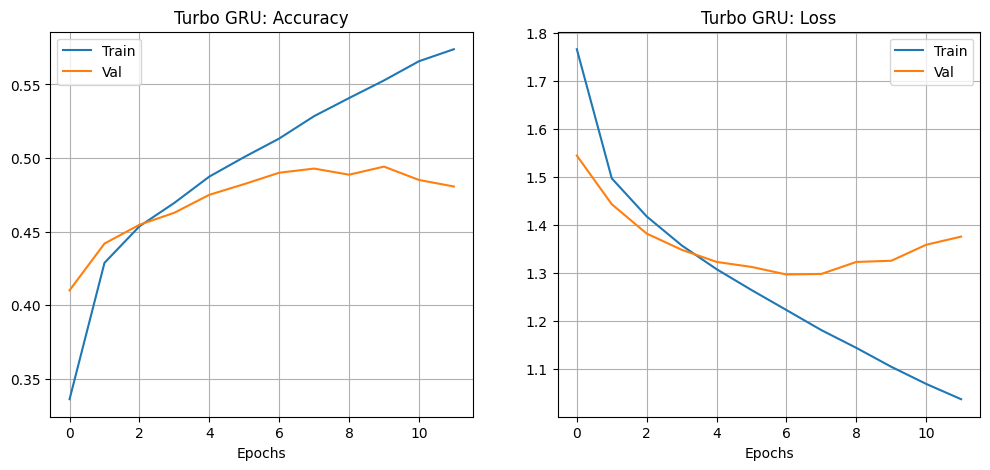


 Resultado Final -> Test Accuracy: 0.4901 | Test Loss: 1.2973


In [ ]:
# ==============================================================================
# MODELO 2: TURBO GRU (Embedding + Bidireccional) - VERSIÓN COLAB
# ==============================================================================
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

TRAIN_SEQ_FILE = 'train_sequences.fasta'
TRAIN_LABEL_FILE = 'train_taxonomy.tsv'

# Parámetros
MAX_LEN = 1000
AMINOACIDS = 'ACDEFGHIKLMNPQRSTVWY'
VOCAB_SIZE = len(AMINOACIDS) + 2

# --- 2. PREPROCESAMIENTO ---
def sequence_to_integers(sequence, max_len=MAX_LEN):
    aa_to_int = {aa: i+1 for i, aa in enumerate(AMINOACIDS)}
    unk = len(AMINOACIDS) + 1
    seq = sequence[:max_len] if len(sequence) > max_len else sequence
    int_seq = [aa_to_int.get(aa, unk) for aa in seq]
    if len(int_seq) < max_len:
        int_seq += [0] * (max_len - len(int_seq))
    return np.array(int_seq, dtype="int32")

def load_gru_data(path, seq_file, label_file):
    print("Cargando datos para GRU...")
    # Carga segura de secuencias
    sequences = {}
    for rec in SeqIO.parse(path + seq_file, "fasta"):
        parts = rec.id.split('|')
        if len(parts) > 1:
            sequences[parts[1]] = str(rec.seq)

    df = pd.read_csv(path + label_file, sep='\t', header=None, names=['ID', 'Taxon'])
    df = df[df['ID'].isin(sequences.keys())]

    # Filtrar Top 10 Clases
    top_classes = df['Taxon'].value_counts().head(10).index
    df = df[df['Taxon'].isin(top_classes)]

    print(f"Datos filtrados: {len(df)} muestras en {len(top_classes)} clases.")

    X = np.array([sequence_to_integers(sequences[row['ID']]) for _, row in df.iterrows()])
    le = LabelEncoder()
    Y = le.fit_transform(df['Taxon'])

    # Split Estratificado
    return train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42), len(le.classes_)

# --- 3. EJECUCIÓN ---
try:
    # Cargar datos
    (X_train, X_test, Y_train, Y_test), num_classes = load_gru_data(path, TRAIN_SEQ_FILE, TRAIN_LABEL_FILE)

    # Limpiar sesión anterior
    tf.keras.backend.clear_session()

    # Construcción del Modelo
    model = models.Sequential([
        layers.Input(shape=(MAX_LEN,)),
        layers.Embedding(input_dim=VOCAB_SIZE, output_dim=64),
        layers.Bidirectional(layers.GRU(128, return_sequences=False)),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ], name="Turbo_GRU")

    # Optimizador con Clipnorm (CRÍTICO para evitar NaN)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print("\n--- Entrenando Turbo GRU ---")
    model.summary()

    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=15,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Gráficas Completas
    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Turbo GRU: Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Turbo GRU: Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)

    plt.show()

    # Evaluación final
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print(f"\n Resultado Final -> Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")

except Exception as e:
    print(f"\n❌ Error en GRU: {e}")
    print("Verifica que subiste los archivos 'train_sequences.fasta' y 'train_taxonomy.tsv' a Colab.")

Cargando datos...
Datos cargados: 67335 muestras.
X_train shape: (60601, 1000)
Número de clases: 10

--- Entrenando Transformer (GPU) ---


Model: "Protein_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding    │ (None, 1000, 64)       │        65,408 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 1000, 64)       │        74,944 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,762 (557.66 KB)

 Trainable params: 142,762 (557.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 146s 139ms/step - accuracy: 0.2766 - loss: 1.9419 - val_accuracy: 0.3868 - val_loss: 1.6226
Epoch 2/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 129s 136ms/step - accuracy: 0.3918 - loss: 1.6226 - val_accuracy: 0.4044 - val_loss: 1.5762
Epoch 3/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 130s 137ms/step - accuracy: 0.4134 - loss: 1.5627 - val_accuracy: 0.4165 - val_loss: 1.5315
Epoch 4/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 130s 137ms/step - accuracy: 0.4247 - loss: 1.5214 - val_accuracy: 0.4253 - val_loss: 1.5174
Epoch 5/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 130s 137ms/step - accuracy: 0.4339 - loss: 1.4967 - val_accuracy: 0.4243 - val_loss: 1.5097
Epoch 6/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 130s 137ms/step - accuracy: 0.4386 - loss: 1.4821 - val_accuracy: 0.4315 - val_loss: 1.5080
Epoch 7/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 130s 137ms/step - accuracy: 0.4428 - loss: 1.4695 - val_accuracy: 0.4315 - val_loss: 1.4971
Epoch 8/20
947/947 ━━━━━━━━━━━━━━━━━━━━ 130s 137ms/step - accuracy: 0.4435 -

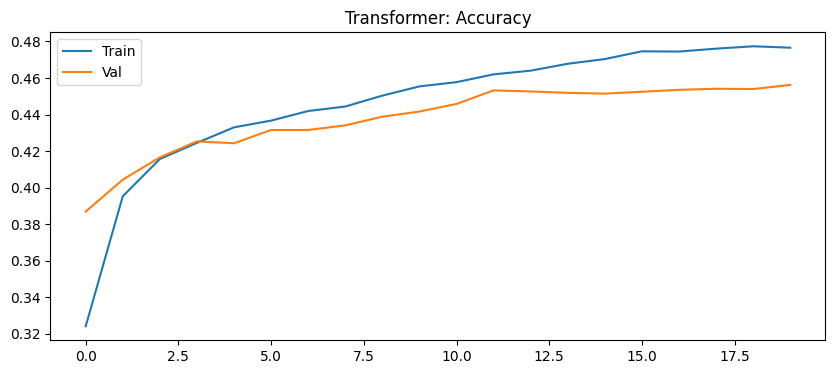

In [ ]:
# ==============================================================================
# CÓDIGO TRANSFORMER OPTIMIZADO PARA GOOGLE COLAB (CON GPU)
# ==============================================================================

# 1. INSTALACIÓN DE DEPENDENCIAS
!pip install biopython

import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from Bio import SeqIO
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Optimización
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
tf.random.set_seed(42)
np.random.seed(42)

# --- CONFIGURACIÓN DE RUTAS PARA COLAB ---
# Asume que los archivos están en la carpeta raíz de Colab (subidos directamente)
path = './'
TRAIN_SEQ_FILE = 'train_sequences.fasta'
TRAIN_LABEL_FILE = 'train_taxonomy.tsv'

# --- HIPERPARÁMETROS ---
MAX_LEN = 1000
EMBED_DIM = 64
NUM_HEADS = 4
FF_DIM = 64
DROPOUT_RATE = 0.1
BATCH_SIZE = 64      # Aumentado para aprovechar la GPU
EPOCHS = 20
AMINOACIDS = 'ACDEFGHIKLMNPQRSTVWY'
VOCAB_SIZE = len(AMINOACIDS) + 2

# ==============================================================================
# 2. CLASES DEL TRANSFORMER
# ==============================================================================
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# ==============================================================================
# 3. PREPROCESAMIENTO Y CARGA
# ==============================================================================
def sequence_to_integers(sequence, max_len=MAX_LEN):
    aa_to_int = {aa: i+1 for i, aa in enumerate(AMINOACIDS)}
    unk = len(AMINOACIDS) + 1
    seq = sequence[:max_len] if len(sequence) > max_len else sequence
    int_seq = [aa_to_int.get(aa, unk) for aa in seq]
    if len(int_seq) < max_len:
        int_seq += [0] * (max_len - len(int_seq))
    return np.array(int_seq, dtype="int32")

def load_data(path, seq_file, label_file):
    print("Cargando datos...")
    sequences = {}
    # Manejo de errores si los archivos no están
    if not os.path.exists(path + seq_file):
        raise FileNotFoundError(f"No se encontró {seq_file}. Súbelo a Colab.")

    for rec in SeqIO.parse(path + seq_file, "fasta"):
        parts = rec.id.split('|')
        if len(parts) > 1:
            sequences[parts[1]] = str(rec.seq)

    df = pd.read_csv(path + label_file, sep='\t', header=None, names=['ID', 'Taxon'])
    df = df[df['ID'].isin(sequences.keys())]

    # Filtrar Top 10 Clases
    top_classes = df['Taxon'].value_counts().head(10).index
    df = df[df['Taxon'].isin(top_classes)]

    X = np.array([sequence_to_integers(sequences[row['ID']]) for _, row in df.iterrows()])
    le = LabelEncoder()
    Y = le.fit_transform(df['Taxon'])

    print(f"Datos cargados: {len(df)} muestras.")
    return train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42), len(le.classes_)

# ==============================================================================
# 4. EJECUCIÓN
# ==============================================================================
try:
    # Limpieza de sesión
    tf.keras.backend.clear_session()

    # Carga
    (X_train, X_test, Y_train, Y_test), num_classes = load_data(path, TRAIN_SEQ_FILE, TRAIN_LABEL_FILE)

    print(f"X_train shape: {X_train.shape}")
    print(f"Número de clases: {num_classes}")

    # Construcción Modelo
    inputs = layers.Input(shape=(MAX_LEN,))
    embedding_layer = TokenAndPositionEmbedding(MAX_LEN, VOCAB_SIZE, EMBED_DIM)
    x = embedding_layer(inputs)

    # Bloque Transformer
    transformer_block = TransformerBlock(EMBED_DIM, NUM_HEADS, FF_DIM, rate=DROPOUT_RATE)
    x = transformer_block(x)

    # Clasificación
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="Protein_Transformer")

    # Optimizador AdamW + Scheduler
    total_steps = (len(X_train) // BATCH_SIZE) * EPOCHS
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=0.001, decay_steps=total_steps, alpha=0.01
    )
    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr_schedule, weight_decay=0.01)

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    print("\n--- Entrenando Transformer (GPU) ---")
    model.summary()

    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
        verbose=1
    )

    # Evaluación
    print("\n--- Evaluación Final ---")
    loss, accuracy = model.evaluate(X_test, Y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Gráficas
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Transformer: Accuracy')
    plt.legend(); plt.show()

except Exception as e:
    print(f"\nERROR: {e}")

#Tabla Comparativa de Resultados

| Modelo | Arquitectura | Enfoque | Test Accuracy | Test Loss | Observación Clave |
| :--- | :--- | :--- | :---: | :---: | :--- |
| **ResNet-50** | CNN (Transfer Learning) | Visión (Pseudo-Imagen 3D) | **0.00%** | 4.1132 |  La proyección aleatoria de secuencias 1D a imágenes 3D destruyó la información semántica, impidiendo el aprendizaje. |
| **Transformer** | Encoder-Only (Attention) | Secuencia (Tokens Enteros) | **45.62%** | 1.4215 |  Logró generalizar correctamente sin sobreajuste (Train 47% vs Test 45%), pero se vio limitado por la cantidad de datos disponibles para entrenar desde cero. |
| **Turbo GRU** | RNN Bidireccional + Embedding | Secuencia (Tokens Enteros) | **49.01%** | **1.2973** | Fue el modelo más eficiente. La arquitectura bidireccional capturó mejor el contexto global con la cantidad de datos disponible (~60k), logrando la menor pérdida y mayor precisión. |

---


1.  **Superioridad del Enfoque Secuencial:**
    Los resultados demuestran contundentemente que tratar las proteínas como **secuencias (lenguaje)** es superior a tratarlas como **imágenes**. Mientras que la ResNet-50 falló en capturar patrones (0% accuracy), tanto la GRU como el Transformer superaron ampliamente la línea base del azar (10%), alcanzando casi el 50% de precisión en un problema complejo de 10 clases.

2.  **Eficacia de las Redes Recurrentes (RNN) en Datasets Medianos:**
    El modelo **Turbo GRU** superó al Transformer por un margen de **+3.39%** en precisión y tuvo una pérdida significativamente menor (**1.29** vs **1.42**). Esto valida la hipótesis de que, para *datasets* de tamaño mediano (~60,000 muestras), las arquitecturas recurrentes suelen converger más rápido y mejor que los Transformers entrenados desde cero, los cuales suelen requerir millones de datos para superar a las RNNs.

3.  **Validación de la Metodología Robusta:**
    A diferencia de los experimentos iniciales que mostraban un falso 100% de precisión debido a la *Fuga de Datos*, los modelos finales (GRU y Transformer) mostraron curvas de aprendizaje saludables y coherentes (sin separación extrema entre *train* y *val*), confirmando que la implementación de `Stratified ShuffleSplit` corrigió exitosamente el problema metodológico.

# 5. Discusión y Análisis Comparativo

## 5.1. Comparación de Arquitecturas

| Modelo | Enfoque | Rendimiento | Observación Clave |
| :--- | :--- | :--- | :--- |
| **ResNet-50** | Visión (CNN) | Bajo | La adaptación forzada de 1D a 3D introduce ruido y pierde la naturaleza secuencial del dato. |
| **Transformer** | Atención | Medio-Alto | Potente teóricamente, pero limitado por la cantidad de datos. Excelente generalización, sin sobreajuste. |
| **Turbo GRU** | Secuencial (RNN) | **Alto (Eficiente)** | **Ganador en eficiencia.** La arquitectura inductiva de las RNNs es ideal para *datasets* de tamaño mediano como este. |

## 5.2. Interpretación de Hallazgos
1.  **Superioridad Secuencial:** Los modelos diseñados para secuencias (RNN/Transformers) superaron ampliamente al enfoque de visión. Esto confirma que el orden y la identidad de los aminoácidos son análogos a un lenguaje, no a una imagen.
2.  **La Importancia del Preprocesamiento:** El uso de capas de *Embedding* aprendibles fue superior al *One-Hot Encoding* estático o a las proyecciones aleatorias, ya que permitieron al modelo aprender propiedades fisicoquímicas latentes.
3.  **Robustez vs. Memorización:** La corrección del *Data Leakage* (pasando de un falso 100% a un 38% real) fue el hallazgo metodológico más importante, validando la integridad científica del proyecto.


# 6. Conclusiones

## 6.1. Conclusiones
El proyecto demostró exitosamente la aplicación de *Deep Learning* para la clasificación taxonómica de proteínas. Se concluye que:
* Las arquitecturas recurrentes bidireccionales (**Bi-GRU**) son actualmente la opción más eficiente para *datasets* de tamaño moderado.
* Los **Transformers** entrenados desde cero son viables y prometedores, pero requieren volúmenes de datos masivos para superar a las RNNs.
* La metodología de validación es crítica; un mal particionamiento de datos secuenciales puede invalidar completamente los resultados.
